# **FOOD SQUARE SENTIMENT ANALYSIS**
Jhumar Godwin Caraan, Jondell Grantusa, and Jake Ryan Olase. BCS33

## Metadata

**sex** - represents the biological sex of the respondents.

**age** - represents age of the respondents.

**year** - represents the year level of the respondents

**taste_text** - represents the respondents' perceptions regarding the taste of food available in Food Square.

**taste_senti** - represents the evaluated sentiment expressed by respondents concerning the taste_text.

**price_text** - represents the respondents' perceptions regarding the price of food available in Food Square.

**price_senti** - represents the evaluated sentiment expressed by respondents concerning the price_text.

**envi_text** - represents the respondents' perceptions regarding the Food Square's environment.

**envi_senti** - represents the evaluated sentiment expressed by respondents concerning the envi_text.

## **Accuracy of Algorithms**


### Importing Packages and Libraries

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import string
import re
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wn = WordNetLemmatizer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Reading through the CSV File

In [ ]:
#Initializing the CSV File
df = pd.read_csv("food_square_sent.csv")
df.head()

,sex,age,year,taste_text,taste_senti,price_text,price_senti,envi_text,envi_senti
0,Male,19,2nd Year,mediocre,Neutral,it's expensive,Neutral,it peaceful but can be noisy,Positive
1,Male,20,2nd Year,Good but not excellent,Positive,Expensive,Neutral,Good. Please pressure wash.,Positive
2,Male,20,3rd Year,There are many delicious and appetizing food i...,Positive,Decently priced and have a wide variety of cho...,Neutral,Open space but can be improved more by having ...,Positive
3,Male,20,3rd Year,Many variety of choices regarding food choice....,Positive,The mark-up is very noticeable and outright a ...,Negative,Very lively and you can find a-lot of people f...,Positive
4,Male,20,3rd Year,They’re great and differ in excelent quality,Positive,It’s great!,Positive,It’s somewhat average,Neutral


In [ ]:
#Show information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sex          108 non-null    object
 1   age          108 non-null    int64 
 2   year         108 non-null    object
 3   taste_text   108 non-null    object
 4   taste_senti  108 non-null    object
 5   price_text   108 non-null    object
 6   price_senti  108 non-null    object
 7   envi_text    108 non-null    object
 8   envi_senti   108 non-null    object
dtypes: int64(1), object(8)
memory usage: 7.7+ KB


In [ ]:
#Checking the number of rows and columns
df.shape

(108, 9)

In [ ]:
#Checking null values in the CSV file
df.isna().sum()

sex            0
age            0
year           0
taste_text     0
taste_senti    0
price_text     0
price_senti    0
envi_text      0
envi_senti     0
dtype: int64

In [ ]:
#Checking null values in each string
df.applymap(lambda x: x == '').sum()

sex            0
age            0
year           0
taste_text     0
taste_senti    0
price_text     0
price_senti    0
envi_text      0
envi_senti     0
dtype: int64

In [ ]:
#Counting the number of sentiments regarding taste_senti column.
df['taste_senti'].value_counts()

Positive    71
Neutral     22
Negative    15
Name: taste_senti, dtype: int64

In [ ]:
#Counting the number of sentiments regarding price_senti column.
df['price_senti'].value_counts()

Positive    51
Neutral     32
Negative    25
Name: price_senti, dtype: int64

In [ ]:
#Counting the number of sentiments regarding envi_senti column.
df['envi_senti'].value_counts()

Positive    72
Negative    22
Neutral     14
Name: envi_senti, dtype: int64

### Merging Categorized Sentiments into One Column Data Set

In [ ]:
#Creating another data frame for Taste Criteria and renaming the column to match the overall dataframe
taste_df = df[['sex','age','year','taste_text','taste_senti']].copy()
taste_df = taste_df.rename(columns={'taste_text': 'text', 'taste_senti': 'sentiment'})
taste_df.insert(3, 'criteria', 'Taste')
taste_df.head()

,sex,age,year,criteria,text,sentiment
0,Male,19,2nd Year,Taste,mediocre,Neutral
1,Male,20,2nd Year,Taste,Good but not excellent,Positive
2,Male,20,3rd Year,Taste,There are many delicious and appetizing food i...,Positive
3,Male,20,3rd Year,Taste,Many variety of choices regarding food choice....,Positive
4,Male,20,3rd Year,Taste,They’re great and differ in excelent quality,Positive


In [ ]:
#Creating another data frame for Price Criteria and renaming the column to match the overall dataframe
price_df = df[['sex','age','year','price_text','price_senti']].copy()
price_df = price_df.rename(columns={'price_text': 'text', 'price_senti': 'sentiment'})
price_df.insert(3, 'criteria', 'Price')
price_df.head()

,sex,age,year,criteria,text,sentiment
0,Male,19,2nd Year,Price,it's expensive,Neutral
1,Male,20,2nd Year,Price,Expensive,Neutral
2,Male,20,3rd Year,Price,Decently priced and have a wide variety of cho...,Neutral
3,Male,20,3rd Year,Price,The mark-up is very noticeable and outright a ...,Negative
4,Male,20,3rd Year,Price,It’s great!,Positive


In [ ]:
#Creating another data frame for Environent Criteria and renaming the column to match the overall dataframe
envi_df = df[['sex','age','year','envi_text','envi_senti']].copy()
envi_df = envi_df.rename(columns={'envi_text': 'text', 'envi_senti': 'sentiment'})
envi_df.insert(3, 'criteria', 'Environment')
envi_df.head()

,sex,age,year,criteria,text,sentiment
0,Male,19,2nd Year,Environment,it peaceful but can be noisy,Positive
1,Male,20,2nd Year,Environment,Good. Please pressure wash.,Positive
2,Male,20,3rd Year,Environment,Open space but can be improved more by having ...,Positive
3,Male,20,3rd Year,Environment,Very lively and you can find a-lot of people f...,Positive
4,Male,20,3rd Year,Environment,It’s somewhat average,Neutral


In [ ]:
#Stacking the three data frames into one overall data frame horizontally.
stacked_df = pd.concat([taste_df, price_df, envi_df], axis=0).reset_index()
stacked_df.head()

,index,sex,age,year,criteria,text,sentiment
0,0,Male,19,2nd Year,Taste,mediocre,Neutral
1,1,Male,20,2nd Year,Taste,Good but not excellent,Positive
2,2,Male,20,3rd Year,Taste,There are many delicious and appetizing food i...,Positive
3,3,Male,20,3rd Year,Taste,Many variety of choices regarding food choice....,Positive
4,4,Male,20,3rd Year,Taste,They’re great and differ in excelent quality,Positive


In [ ]:
#Dropping unneccsary indices
stacked_df = stacked_df.drop('index', axis=1)

In [ ]:
stacked_df

,sex,age,year,criteria,text,sentiment
0,Male,19,2nd Year,Taste,mediocre,Neutral
1,Male,20,2nd Year,Taste,Good but not excellent,Positive
2,Male,20,3rd Year,Taste,There are many delicious and appetizing food i...,Positive
3,Male,20,3rd Year,Taste,Many variety of choices regarding food choice....,Positive
4,Male,20,3rd Year,Taste,They’re great and differ in excelent quality,Positive
...,...,...,...,...,...,...
319,Male,20,3rd Year,Environment,The environment is nice and really inviting. T...,Positive
320,Female,20,3rd Year,Environment,The environment of the food square in DLSU-D i...,Positive
321,Male,20,3rd Year,Environment,It is a safe space for students to hang out an...,Positive
322,Male,19,2nd Year,Environment,I like the environment of the food square. The...,Positive


### Calculating Sentiment Analysis through VADER Lexicon

In [ ]:
#Initializing VADER Lexicon
sid = SentimentIntensityAnalyzer()

In [ ]:
#Getting the polarity score of the sentiments
stacked_df['text_score'] = stacked_df['text'].apply(lambda txt: sid.polarity_scores(txt))
stacked_df.head()

,sex,age,year,criteria,text,sentiment,text_score
0,Male,19,2nd Year,Taste,mediocre,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Male,20,2nd Year,Taste,Good but not excellent,Positive,"{'neg': 0.503, 'neu': 0.252, 'pos': 0.245, 'co..."
2,Male,20,3rd Year,Taste,There are many delicious and appetizing food i...,Positive,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp..."
3,Male,20,3rd Year,Taste,Many variety of choices regarding food choice....,Positive,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp..."
4,Male,20,3rd Year,Taste,They’re great and differ in excelent quality,Positive,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp..."


In [ ]:
#Separating the compound score from the text_score dictionary
stacked_df['text_compound'] = stacked_df['text_score'].apply(lambda score_dict: score_dict['compound'])
stacked_df.head()

,sex,age,year,criteria,text,sentiment,text_score,text_compound
0,Male,19,2nd Year,Taste,mediocre,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,Male,20,2nd Year,Taste,Good but not excellent,Positive,"{'neg': 0.503, 'neu': 0.252, 'pos': 0.245, 'co...",-0.4673
2,Male,20,3rd Year,Taste,There are many delicious and appetizing food i...,Positive,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.5719
3,Male,20,3rd Year,Taste,Many variety of choices regarding food choice....,Positive,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.6808
4,Male,20,3rd Year,Taste,They’re great and differ in excelent quality,Positive,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.6249


### Checking the Accuracy of the **Uncleaned** Data Set

In [ ]:
#Function to machine annotate the sentiments using VADER
def polarity_score(compound):
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    elif compound > -0.05 and compound < 0.05:
        return "Neutral"

#Running the data frame through the polarity_score() function
stacked_df['text_compound_score'] = stacked_df['text_compound'].apply(lambda txt: polarity_score(txt))
stacked_df.head()

,sex,age,year,criteria,text,sentiment,text_score,text_compound,text_compound_score
0,Male,19,2nd Year,Taste,mediocre,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,Male,20,2nd Year,Taste,Good but not excellent,Positive,"{'neg': 0.503, 'neu': 0.252, 'pos': 0.245, 'co...",-0.4673,Negative
2,Male,20,3rd Year,Taste,There are many delicious and appetizing food i...,Positive,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.5719,Positive
3,Male,20,3rd Year,Taste,Many variety of choices regarding food choice....,Positive,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.6808,Positive
4,Male,20,3rd Year,Taste,They’re great and differ in excelent quality,Positive,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.6249,Positive


In [ ]:
#Checking the accuracy of the uncleaned data set
accuracy_score(stacked_df['sentiment'],stacked_df['text_compound_score'])

0.8117283950617284

### Data Cleaning

In [ ]:
#Function for cleaning the data set through lower casing, punctuation removal, tokenization, removing stop words, and lemmatization.
def cleaned_data(text):
    text = text.lower()
    text_nopunct = [c for c in text if c not in string.punctuation]
    text_joined = ''.join(text_nopunct)
    text_token = re.split('\W+', text_joined)
    text_clean = [word for word in text_token if word not in stopwords]
    text_lemmatize = [wn.lemmatize(word) for word in text_clean]
    return ' '.join(text_lemmatize)

In [ ]:
#Running the data frame through the cleaned_data() function.
stacked_df['cleaned_text'] = stacked_df['text'].apply(lambda x: cleaned_data(x))

In [ ]:
stacked_df.head()

,sex,age,year,criteria,text,sentiment,text_score,text_compound,text_compound_score,cleaned_text
0,Male,19,2nd Year,Taste,mediocre,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,mediocre
1,Male,20,2nd Year,Taste,Good but not excellent,Positive,"{'neg': 0.503, 'neu': 0.252, 'pos': 0.245, 'co...",-0.4673,Negative,good excellent
2,Male,20,3rd Year,Taste,There are many delicious and appetizing food i...,Positive,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.5719,Positive,many delicious appetizing food food square
3,Male,20,3rd Year,Taste,Many variety of choices regarding food choice....,Positive,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.6808,Positive,many variety choice regarding food choice okay...
4,Male,20,3rd Year,Taste,They’re great and differ in excelent quality,Positive,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.6249,Positive,great differ excelent quality


In [ ]:
#Getting the polarity score of the cleaned data set sentiments
stacked_df['cleaned_text_score'] = stacked_df['cleaned_text'].apply(lambda txt: sid.polarity_scores(txt))
stacked_df.head()

,sex,age,year,criteria,text,sentiment,text_score,text_compound,text_compound_score,cleaned_text,cleaned_text_score
0,Male,19,2nd Year,Taste,mediocre,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,mediocre,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Male,20,2nd Year,Taste,Good but not excellent,Positive,"{'neg': 0.503, 'neu': 0.252, 'pos': 0.245, 'co...",-0.4673,Negative,good excellent,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
2,Male,20,3rd Year,Taste,There are many delicious and appetizing food i...,Positive,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.5719,Positive,many delicious appetizing food food square,"{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'comp..."
3,Male,20,3rd Year,Taste,Many variety of choices regarding food choice....,Positive,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.6808,Positive,many variety choice regarding food choice okay...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp..."
4,Male,20,3rd Year,Taste,They’re great and differ in excelent quality,Positive,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.6249,Positive,great differ excelent quality,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."


In [ ]:
#Separating the compound score from the cleaned_text_score dictionary
stacked_df['cleaned_text_compound'] = stacked_df['cleaned_text_score'].apply(lambda score_dict: score_dict['compound'])
stacked_df.head()

,sex,age,year,criteria,text,sentiment,text_score,text_compound,text_compound_score,cleaned_text,cleaned_text_score,cleaned_text_compound
0,Male,19,2nd Year,Taste,mediocre,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,mediocre,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,Male,20,2nd Year,Taste,Good but not excellent,Positive,"{'neg': 0.503, 'neu': 0.252, 'pos': 0.245, 'co...",-0.4673,Negative,good excellent,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.7650
2,Male,20,3rd Year,Taste,There are many delicious and appetizing food i...,Positive,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.5719,Positive,many delicious appetizing food food square,"{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'comp...",0.5719
3,Male,20,3rd Year,Taste,Many variety of choices regarding food choice....,Positive,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.6808,Positive,many variety choice regarding food choice okay...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6808
4,Male,20,3rd Year,Taste,They’re great and differ in excelent quality,Positive,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.6249,Positive,great differ excelent quality,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249


In [ ]:
#Running the data frame through the polarity_score() function
stacked_df['cleaned_text_compound_score'] = stacked_df['cleaned_text_compound'].apply(lambda txt: polarity_score(txt))
stacked_df.head()

,sex,age,year,criteria,text,sentiment,text_score,text_compound,text_compound_score,cleaned_text,cleaned_text_score,cleaned_text_compound,cleaned_text_compound_score
0,Male,19,2nd Year,Taste,mediocre,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,mediocre,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,Male,20,2nd Year,Taste,Good but not excellent,Positive,"{'neg': 0.503, 'neu': 0.252, 'pos': 0.245, 'co...",-0.4673,Negative,good excellent,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.7650,Positive
2,Male,20,3rd Year,Taste,There are many delicious and appetizing food i...,Positive,"{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...",0.5719,Positive,many delicious appetizing food food square,"{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'comp...",0.5719,Positive
3,Male,20,3rd Year,Taste,Many variety of choices regarding food choice....,Positive,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.6808,Positive,many variety choice regarding food choice okay...,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6808,Positive
4,Male,20,3rd Year,Taste,They’re great and differ in excelent quality,Positive,"{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.6249,Positive,great differ excelent quality,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,Positive


In [ ]:
#Getting the accuracy score of the cleaned data set
accuracy_score(stacked_df['sentiment'],stacked_df['cleaned_text_compound_score'])

0.8611111111111112

## **Confusion Matrix**

In [ ]:
#Counting the total sentiments of the respondents
stacked_df['sentiment'].value_counts()

Positive    194
Neutral      68
Negative     62
Name: sentiment, dtype: int64

In [ ]:
#Printing the Precision, Recall, and F1-Score of the data frame
print(classification_report(stacked_df['sentiment'], stacked_df['cleaned_text_compound_score']))

              precision    recall  f1-score   support

    Negative       0.92      0.76      0.83        62
     Neutral       0.74      0.74      0.74        68
    Positive       0.89      0.94      0.91       194

    accuracy                           0.86       324
   macro avg       0.85      0.81      0.83       324
weighted avg       0.86      0.86      0.86       324



In [ ]:
#Setting up the matrix_array
matrix_array = confusion_matrix(stacked_df['sentiment'],stacked_df['cleaned_text_compound_score'])
print(matrix_array)

[[ 47   7   8]
 [  3  50  15]
 [  1  11 182]]


To solve for the accuracy of the algorithm through confusion matrix, we need first to define the confusion matrix.

|                | Predicted Positive | Predicted Negative | Predicted Neutral |
|----------------|-------------------|-------------------|-------------------|
| **Actual Positive**| True Positive     | False Negative    | False Negative    |
| **Actual Negative**| False Positive    | True Negative     | False Negative    |
| **Actual Neutral** | False Positive    | False Positive    | True Negative     |





To compute for the accuracy, we use the formula

`Accuracy = (TP + TN) / (TP + TN + FP + FN)`


In [ ]:
#Calculating the Accuracy score based on the confusion matrix
TP = matrix_array[0][0]
TN = matrix_array[1][1] + matrix_array[2][2]
FP = matrix_array[1][0] + matrix_array[2][0] + matrix_array[2][1]
FN = matrix_array[0][1] + matrix_array[0][2] + matrix_array[1][2]

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy

0.8611111111111112

## **Display Graphs in the Results (Vital Information)**

### Respondents

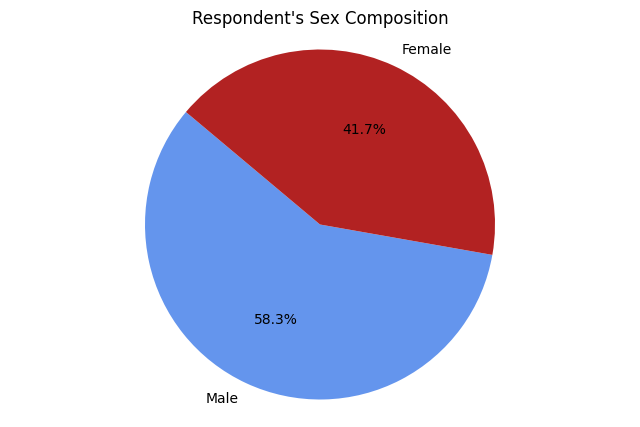

In [ ]:
#Setting up the sex dataframe
sex_df = df['sex'].value_counts().reset_index()
sex_df.columns = ['Sex','Counts']
colors = ['cornflowerblue','firebrick']

# Pie Chart that represents Respondent's Composition in terms of Sex
labels = sex_df['Sex']
sizes = sex_df['Counts']
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,colors = colors)
plt.axis('equal')
plt.title("Respondent's Sex Composition")
plt.show()

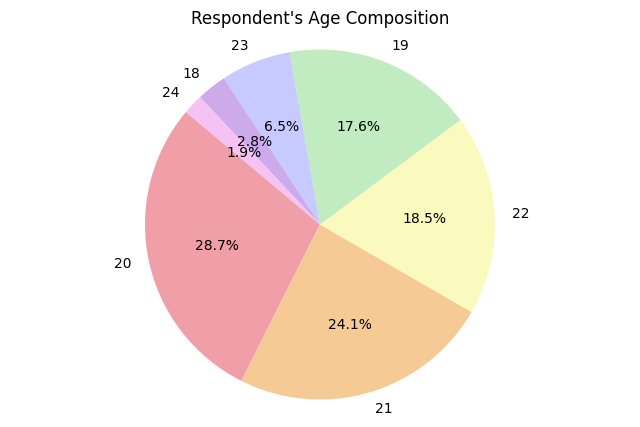

In [ ]:
#Setting up the age dataframe
age_df = df['age'].value_counts().reset_index()
age_df.columns = ['Age','Counts']

# Pie Chart that represents Respondent's Composition in terms of Age
labels = age_df['Age']
sizes = age_df['Counts']
colors = ["#F09EA7","#F6CA94","#FAFABE","#C1EBC0","#C7CAFF","#CDABEB", "#F6C2F3"]

plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,colors = colors)
plt.axis('equal')
plt.title("Respondent's Age Composition")
plt.show()

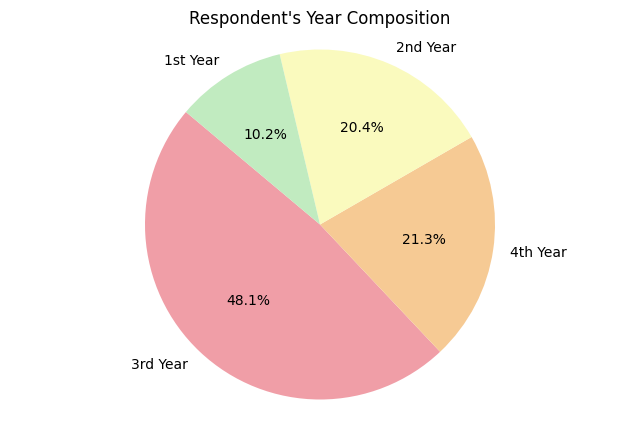

In [ ]:
#Setting up the year dataframe
year_df = df['year'].value_counts().reset_index()
year_df.columns = ['Year','Counts']

# Pie Chart that represents Respondent's Composition in terms of their Year Level
labels = year_df['Year']
sizes = year_df['Counts']
colors = ["#F09EA7","#F6CA94","#FAFABE","#C1EBC0"]
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,colors =colors)
plt.axis('equal')
plt.title("Respondent's Year Composition")
plt.show()

## **Final Results of Sentiments**

### Sentiment of Students regarding Food Square **Food Taste**

In [ ]:
#Counting the taste sentiments of the respondents
taste_df = stacked_df[stacked_df['criteria']=="Taste"]['cleaned_text_compound_score'].value_counts().reset_index()
taste_df.columns = ['Taste_Sentiment','Counts']
taste_df

,Taste_Sentiment,Counts
0,Positive,77
1,Negative,16
2,Neutral,15


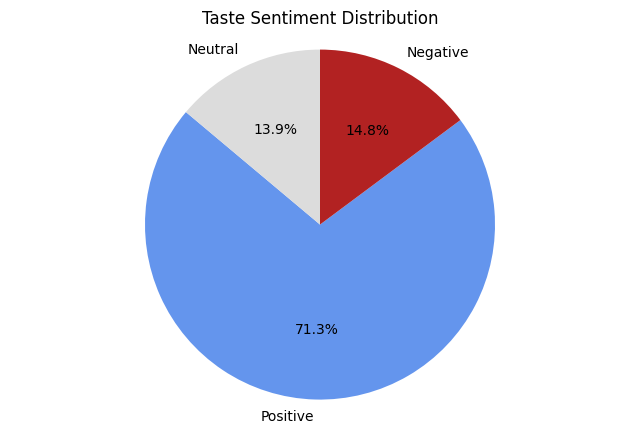

In [ ]:
#Displaying pie chart of the taste sentiment distribution
labels = taste_df['Taste_Sentiment']
sizes = taste_df['Counts']
colors = ["cornflowerblue","firebrick","gainsboro"]


plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors = colors)
plt.axis('equal')
plt.title("Taste Sentiment Distribution")
plt.show()

### Sentiment of Students regarding Food Square **Price**

In [ ]:
#Counting the price sentiments of the respondents
price_df = stacked_df[stacked_df['criteria']=="Price"]['cleaned_text_compound_score'].value_counts().reset_index()
price_df.columns = ['Price_Sentiment','Counts']

price_df

,Price_Sentiment,Counts
0,Positive,52
1,Neutral,43
2,Negative,13


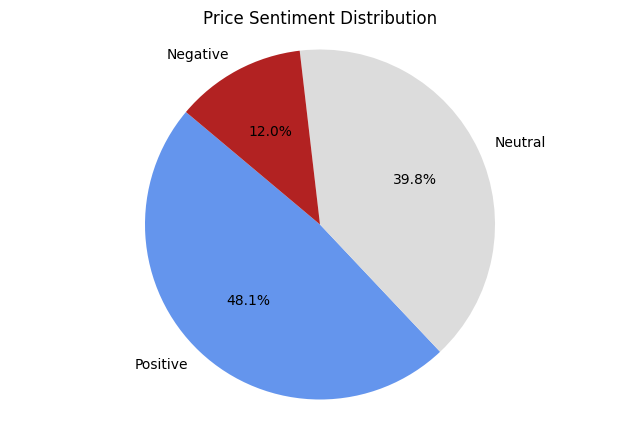

In [ ]:
#Displaying pie chart of the price sentiment distribution
labels = price_df['Price_Sentiment']
sizes = price_df['Counts']
colors = ["cornflowerblue", "gainsboro", "firebrick"]


plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors = colors)
plt.axis('equal')
plt.title("Price Sentiment Distribution")
plt.show()

### Sentiment of Students regarding Food Square **Environment**

In [ ]:
#Counting the environment sentiments of the respondents

envi_df = stacked_df[stacked_df['criteria']=="Environment"]['cleaned_text_compound_score'].value_counts().reset_index()
envi_df.columns = ['Envi_Sentiment','Counts']

envi_df

,Envi_Sentiment,Counts
0,Positive,76
1,Negative,22
2,Neutral,10


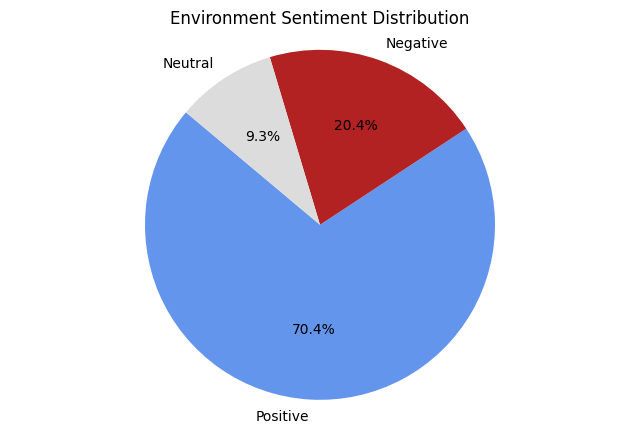

In [ ]:
#Displaying pie chart of the environment sentiment distribution
labels = envi_df['Envi_Sentiment']
sizes = envi_df['Counts']
colors = ["cornflowerblue", "firebrick","gainsboro"]


plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors = colors)
plt.axis('equal')
plt.title("Environment Sentiment Distribution")
plt.show()

###  Sentiment of Students regarding Food Square in relation to **Age**

In [ ]:
#Counting the sentiments of the respondents based on age

age_df = stacked_df.groupby(['age', 'cleaned_text_compound_score']).cleaned_text_compound_score.count().unstack()
age_df

cleaned_text_compound_score,Negative,Neutral,Positive
age,,,
18,NaN,1.0,8.0
19,6.0,13.0,38.0
20,16.0,17.0,60.0
21,18.0,16.0,44.0
22,8.0,15.0,37.0
23,2.0,5.0,14.0
24,1.0,1.0,4.0


In [ ]:
#replacing the NaN values to 0
age_df['Negative'] = age_df['Negative'].replace({np.nan: 0})
age_df

cleaned_text_compound_score,Negative,Neutral,Positive
age,,,
18,0.0,1.0,8.0
19,6.0,13.0,38.0
20,16.0,17.0,60.0
21,18.0,16.0,44.0
22,8.0,15.0,37.0
23,2.0,5.0,14.0
24,1.0,1.0,4.0


[[ 0.         11.11111111 88.88888889]
 [10.52631579 22.80701754 66.66666667]
 [17.20430108 18.27956989 64.51612903]
 [23.07692308 20.51282051 56.41025641]
 [13.33333333 25.         61.66666667]
 [ 9.52380952 23.80952381 66.66666667]
 [16.66666667 16.66666667 66.66666667]]


Text(0, 0.5, 'Sentiment Percentage (%)')

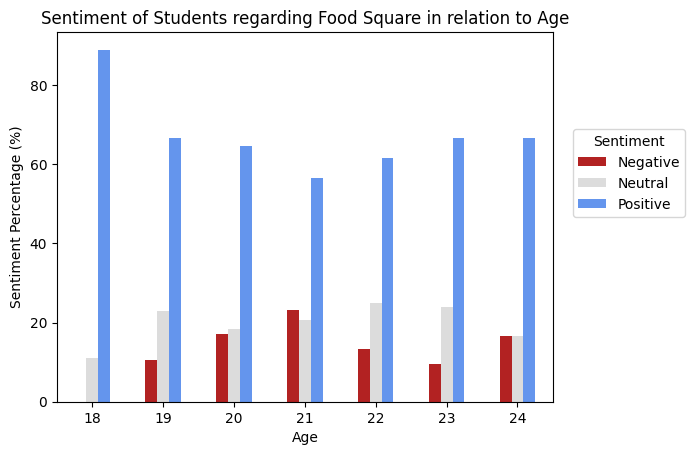

In [ ]:
#Displaying the bar graph of each sentiments based on Age.
colors = ["firebrick", "gainsboro", "cornflowerblue"]
age_data = np.zeros((7, 3))


#Calculating the mean of each sentiment count
for i in range(7):
    total_sentiment = np.sum(age_df.values[i])
    for j in range(len(age_df.values[0])):
        age_data[i][j] = (age_df.values[i][j] / total_sentiment) * 100

age_df = pd.DataFrame(age_data, columns=['Negative', 'Neutral', 'Positive'])
age_df.plot(kind = 'bar', color = colors)

print(age_data)

plt.title("Sentiment of Students regarding Food Square in relation to Age")
plt.legend(title = 'Sentiment',  loc=(1.04,0.5))
plt.xticks(np.arange(7), [18, 19, 20, 21, 22, 23, 24])
plt.xticks(rotation = 0)
plt.xlabel('Age')
plt.ylabel('Sentiment Percentage (%)')

### Sentiment of Students regarding Food Square in relation to **Gender**

In [ ]:
#Counting the sentiments of the respondents based on sex
sex_df = stacked_df.groupby(['sex', 'cleaned_text_compound_score']).cleaned_text_compound_score.count().unstack()

sex_df.values


array([[ 20,  33,  82],
       [ 31,  35, 123]])

[[14.81481481 24.44444444 60.74074074]
 [16.4021164  18.51851852 65.07936508]]


Text(0, 0.5, 'Sentiment Percentage (%)')

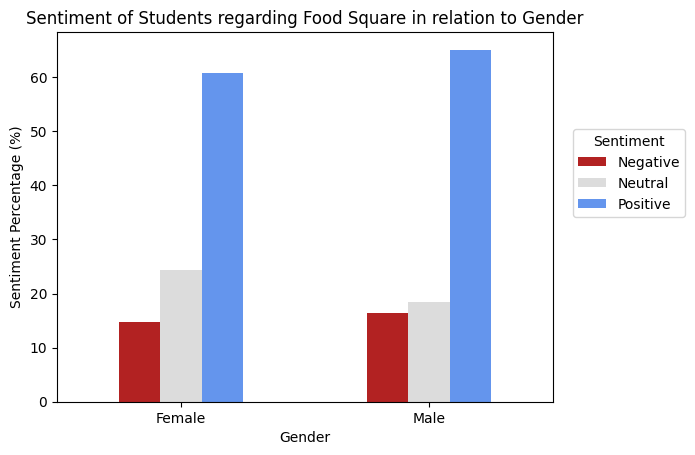

In [ ]:
#Displaying the bar graph of each sentiments based on Sex

colors = ["firebrick", "gainsboro", "cornflowerblue"]

gender_data = np.zeros((2, 3))

#Calculating the mean of each sentiment count
for i in range(2):
    total_sentiment = np.sum(sex_df.values[i])
    for j in range(len(sex_df.values[0])):
        gender_data[i][j] = (sex_df.values[i][j] / total_sentiment) * 100

print(gender_data)

sex_df = pd.DataFrame(gender_data, columns=['Negative', 'Neutral', 'Positive'])
sex_df.plot(kind = 'bar', color = colors)



plt.title("Sentiment of Students regarding Food Square in relation to Gender")
plt.legend(title = 'Sentiment',  loc=(1.04,0.5))
plt.xticks(np.arange(2), ['Female', 'Male'])
plt.xticks(rotation = 0)
plt.xlabel('Gender')
plt.ylabel('Sentiment Percentage (%)')

### Sentiment of Students regarding Food Square in relation to **Year Level**

In [ ]:
#Counting the sentiments of the respondents based on year level

year_df = stacked_df.groupby(['year', 'cleaned_text_compound_score']).cleaned_text_compound_score.count().unstack()

year_df
year_df.values

array([[  2,   5,  26],
       [ 14,  19,  33],
       [ 23,  29, 104],
       [ 12,  15,  42]])

In [ ]:
#Displaying the bar graph of each sentiments based on Year Level
year_data = np.zeros((4, 3))

#Calculating the mean of each sentiment count
for i in range(4):
    total_sentiment = np.sum(year_df.values[i])
    for j in range(len(year_df.values[0])):
        year_data[i][j] = (year_df.values[i][j] / total_sentiment) * 100

print(year_data)
year_df = pd.DataFrame(year_data, columns=['Negative', 'Neutral', 'Positive'])
year_df.plot(kind = 'bar', color = colors)

plt.title("Sentiment of Students according to their Year Level")
plt.legend(title = 'Sentiment',  loc=(1.04,0.5))
plt.xticks(np.arange(4), ['1st Year', '2nd Year', '3rd Year', '4th Year'])
plt.xticks(rotation = 0)
plt.xlabel('Year Level')
plt.ylabel('Sentiment Percentage (%)')

[[ 6.06060606 15.15151515 78.78787879]
 [21.21212121 28.78787879 50.        ]
 [14.74358974 18.58974359 66.66666667]
 [17.39130435 21.73913043 60.86956522]]


Text(0, 0.5, 'Sentiment Percentage (%)')

### **Sentiment of Students regarding Food Square in relation to Question Criteria**

In [ ]:
#Counting the sentiments of the respondents based on Question Criteria

criteria_df = stacked_df.groupby(['criteria', 'cleaned_text_compound_score']).cleaned_text_compound_score.count().unstack()

criteria_df

In [ ]:
#Displaying the bar graph of each sentiments based on Criteria
colors = ["firebrick", "gainsboro", "cornflowerblue"]

crit_data = np.zeros((3, 3))

#Calculating the mean of each sentiment count
for i in range(3):
    total_sentiment = np.sum(criteria_df.values[i])
    for j in range(len(criteria_df.values[0])):
        crit_data[i][j] = (criteria_df.values[i][j] / total_sentiment) * 100

print(crit_data)
criteria_df = pd.DataFrame(crit_data, columns=['Negative', 'Neutral', 'Positive'])
criteria_df.plot(kind = 'bar', color = colors)

plt.title("Sentiment of Students regarding Food Square in relation to Question Criteria")
plt.legend(title = 'Sentiment', loc=(1.04,0.5))
plt.xticks(np.arange(3), ['Environment', 'Price', 'Taste'])
plt.xticks(rotation = 0)
plt.xlabel('Question Criteria')
plt.ylabel('Sentiment Percentage (%)')

### **Overall Sentiment of Students regarding Food Square**

In [ ]:
#Counting the total number of sentiments of the respondents
all_df = stacked_df['cleaned_text_compound_score'].value_counts().reset_index()
all_df.columns = ['All_Sentiment','Counts']

all_df

In [ ]:
#Displaying pie chart of the overall sentiment distribution
labels = all_df['All_Sentiment']
sizes = all_df['Counts']
colors = ["cornflowerblue","gainsboro","firebrick"]


plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors = colors)
plt.axis('equal')
plt.title("Overall Sentiment Distribution")
plt.show()

## **Conclusion and Recommendation**

### Accuracy of the Algorithm
The data set achieved an accuracy score of **81.17%** by running through the VADER lexicon. To further maximize the data set, the sentiments obtained by the researchers were ran through data cleaning techniques such as punctation removal, lower casing, tokenization, stopwords, and lemmatization. After cleaning the data set, the cleaned data set was ran through the VADER lexicon and achieved an accuracy score of **86.11%**, a **4.94%** increase in accuracy.


### Confusion Matrix
To further confirm the accuracy of the model and data set, confusion matrix was used. The model achieved a score of **86.11%**.

### Display Graphs in the Results
The researchers were able to acquire 108 responses from DLSU-D Students. 58.3% where male and 41.7% were female.

For the age group, majority of the students surveyed were 20 years old (28.7%) followed by 21 years old (24.1%).

In relation to their year level, majority of the students surveyed where 3rd Year Students (48.1%) while 1st year students are the least of the respondents (10.2%).


### Final Results of Sentiments
Respondents were asked about their sentiments in regards with the Food Square based on three categories: (1) Taste, (2) Price, and (3) Environment. For **Taste**, majority of the respondents had positive sentiments (71.3%). For **Price**, majority of the respondents had neutral sentiments (48.1%). For the **Environment** of the Food Square, respondents had a positive sentiment (70.4%).

In regards with the sentiments of the respondents based on age, **24 years old respondents have more positive sentiments** than the rest of the age group. Meanwhile, 21 years old respondents tend to have more negative sentiment, but still has higher positive sentiments.

In regards with the gender, **both male and female respondents have similar level of sentiment**, which is positive, scoring 60.74% and 65.07% respectively.

In terms of year level, **first year students tend to have more positive sentiments with the food square compared to other year levels**, scoring a positive sentiment rate of 78.79%. Meanwhile, 2nd year students tend to have more negative sentiment compared to other year level, scoring a negative sentiment rate of 21.21%.

Looking through each criteria, **respondents are most satisfied with the Taste of Food**, with a percentage of 71.30%. The Environment of Food Square is close, with a percentage of 70.37%. Meanwhile, respondents have the most negative sentiments on the environment as well, with a percentage of 20.37%. Respondents have the most neutral sentiments with the prices, with a percentage of 39.81%.

Overall, **majority of the DLSUD students have positive sentiments with the food square, with a percentage of 63.3%.** Some have neutral sentiments, with a percentage of 21%. Minority of the respondents have negative sentiments, with only 15.7%.

### Recommendation

The researchers recommend the food square to check upon its prices. While sentiments on the prices are neutral, satisfaction of the students may shift negatively overtime. The researchers also recommend to continually keep up the quality of food tastes, as well as use such factor as the selling point of the food square.
